In [1]:
import re

<link href="style.css" rel="stylesheet"></link>

<article class="day-desc"><h2>--- Day 3: Gear Ratios ---</h2><p>You and the Elf eventually reach a <a href="https://en.wikipedia.org/wiki/Gondola_lift" target="_blank">gondola lift</a> station; he says the gondola lift will take you up to the <em>water source</em>, but this is as far as he can bring you. You go inside.</p>
<p>It doesn't take long to find the gondolas, but there seems to be a problem: they're not moving.</p>
<p>"Aaah!"</p>
<p>You turn around to see a slightly-greasy Elf with a wrench and a look of surprise. "Sorry, I wasn't expecting anyone! The gondola lift isn't working right now; it'll still be a while before I can fix it." You offer to help.</p>
<p>The engineer explains that an engine part seems to be missing from the engine, but nobody can figure out which one. If you can <em>add up all the part numbers</em> in the engine schematic, it should be easy to work out which part is missing.</p>
<p>The engine schematic (your puzzle input) consists of a visual representation of the engine. There are lots of numbers and symbols you don't really understand, but apparently <em>any number adjacent to a symbol</em>, even diagonally, is a "part number" and should be included in your sum. (Periods (<code>.</code>) do not count as a symbol.)</p>
<p>Here is an example engine schematic:</p>
<pre><code>467..114..
...*......
..35..633.
......#...
617*......
.....+.58.
..592.....
......755.
...$.*....
.664.598..
</code></pre>
<p>In this schematic, two numbers are <em>not</em> part numbers because they are not adjacent to a symbol: <code>114</code> (top right) and <code>58</code> (middle right). Every other number is adjacent to a symbol and so <em>is</em> a part number; their sum is <code><em>4361</em></code>.</p>
<p>Of course, the actual engine schematic is much larger. <em>What is the sum of all of the part numbers in the engine schematic?</em></p>
</article>


In [2]:
schema_test = """467..114..
...*......
..35..633.
......#...
617*......
.....+.58.
..592.....
......755.
...$.*....
.664.598.."""

print(schema_test)

467..114..
...*......
..35..633.
......#...
617*......
.....+.58.
..592.....
......755.
...$.*....
.664.598..


In [11]:
from re import Match


def get_neighbors(rows: int, cols: int, row: int, m: Match):
    start, end = m.span()
    neighbors = []
    if start - 1 > -1:
        neighbors.append((row, start - 1))

    if row - 1 > -1:
        neighbors.extend(
            (row - 1, col) for col in range(start - 1, end + 1) if 0 <= col < cols
        )

    if end + 1 < cols:
        neighbors.append((row, end))

    if row + 1 < rows:
        neighbors.extend(
            (row + 1, col) for col in range(end, start - 2, -1) if 0 <= col < cols
        )

    return neighbors


def isSymbol(s: str) -> bool:
    return not s.isdigit() and s != "."


def sum_part_numbers(s: str) -> int:
    count = 0
    lines = s.splitlines()
    rows, cols = len(lines), len(lines[0])

    for row in range(rows):
        for m in re.finditer(r"\d+", lines[row]):
            neighbors = get_neighbors(rows, cols, row, m)

            if any(isSymbol(lines[r][c]) for r, c in neighbors):
                count += int(m.group())
    return count


sum_part_numbers(schema_test), 4361

(4361, 4361)

In [13]:
with open("./input/day3.txt") as f:
    print(sum_part_numbers(f.read()))

529618


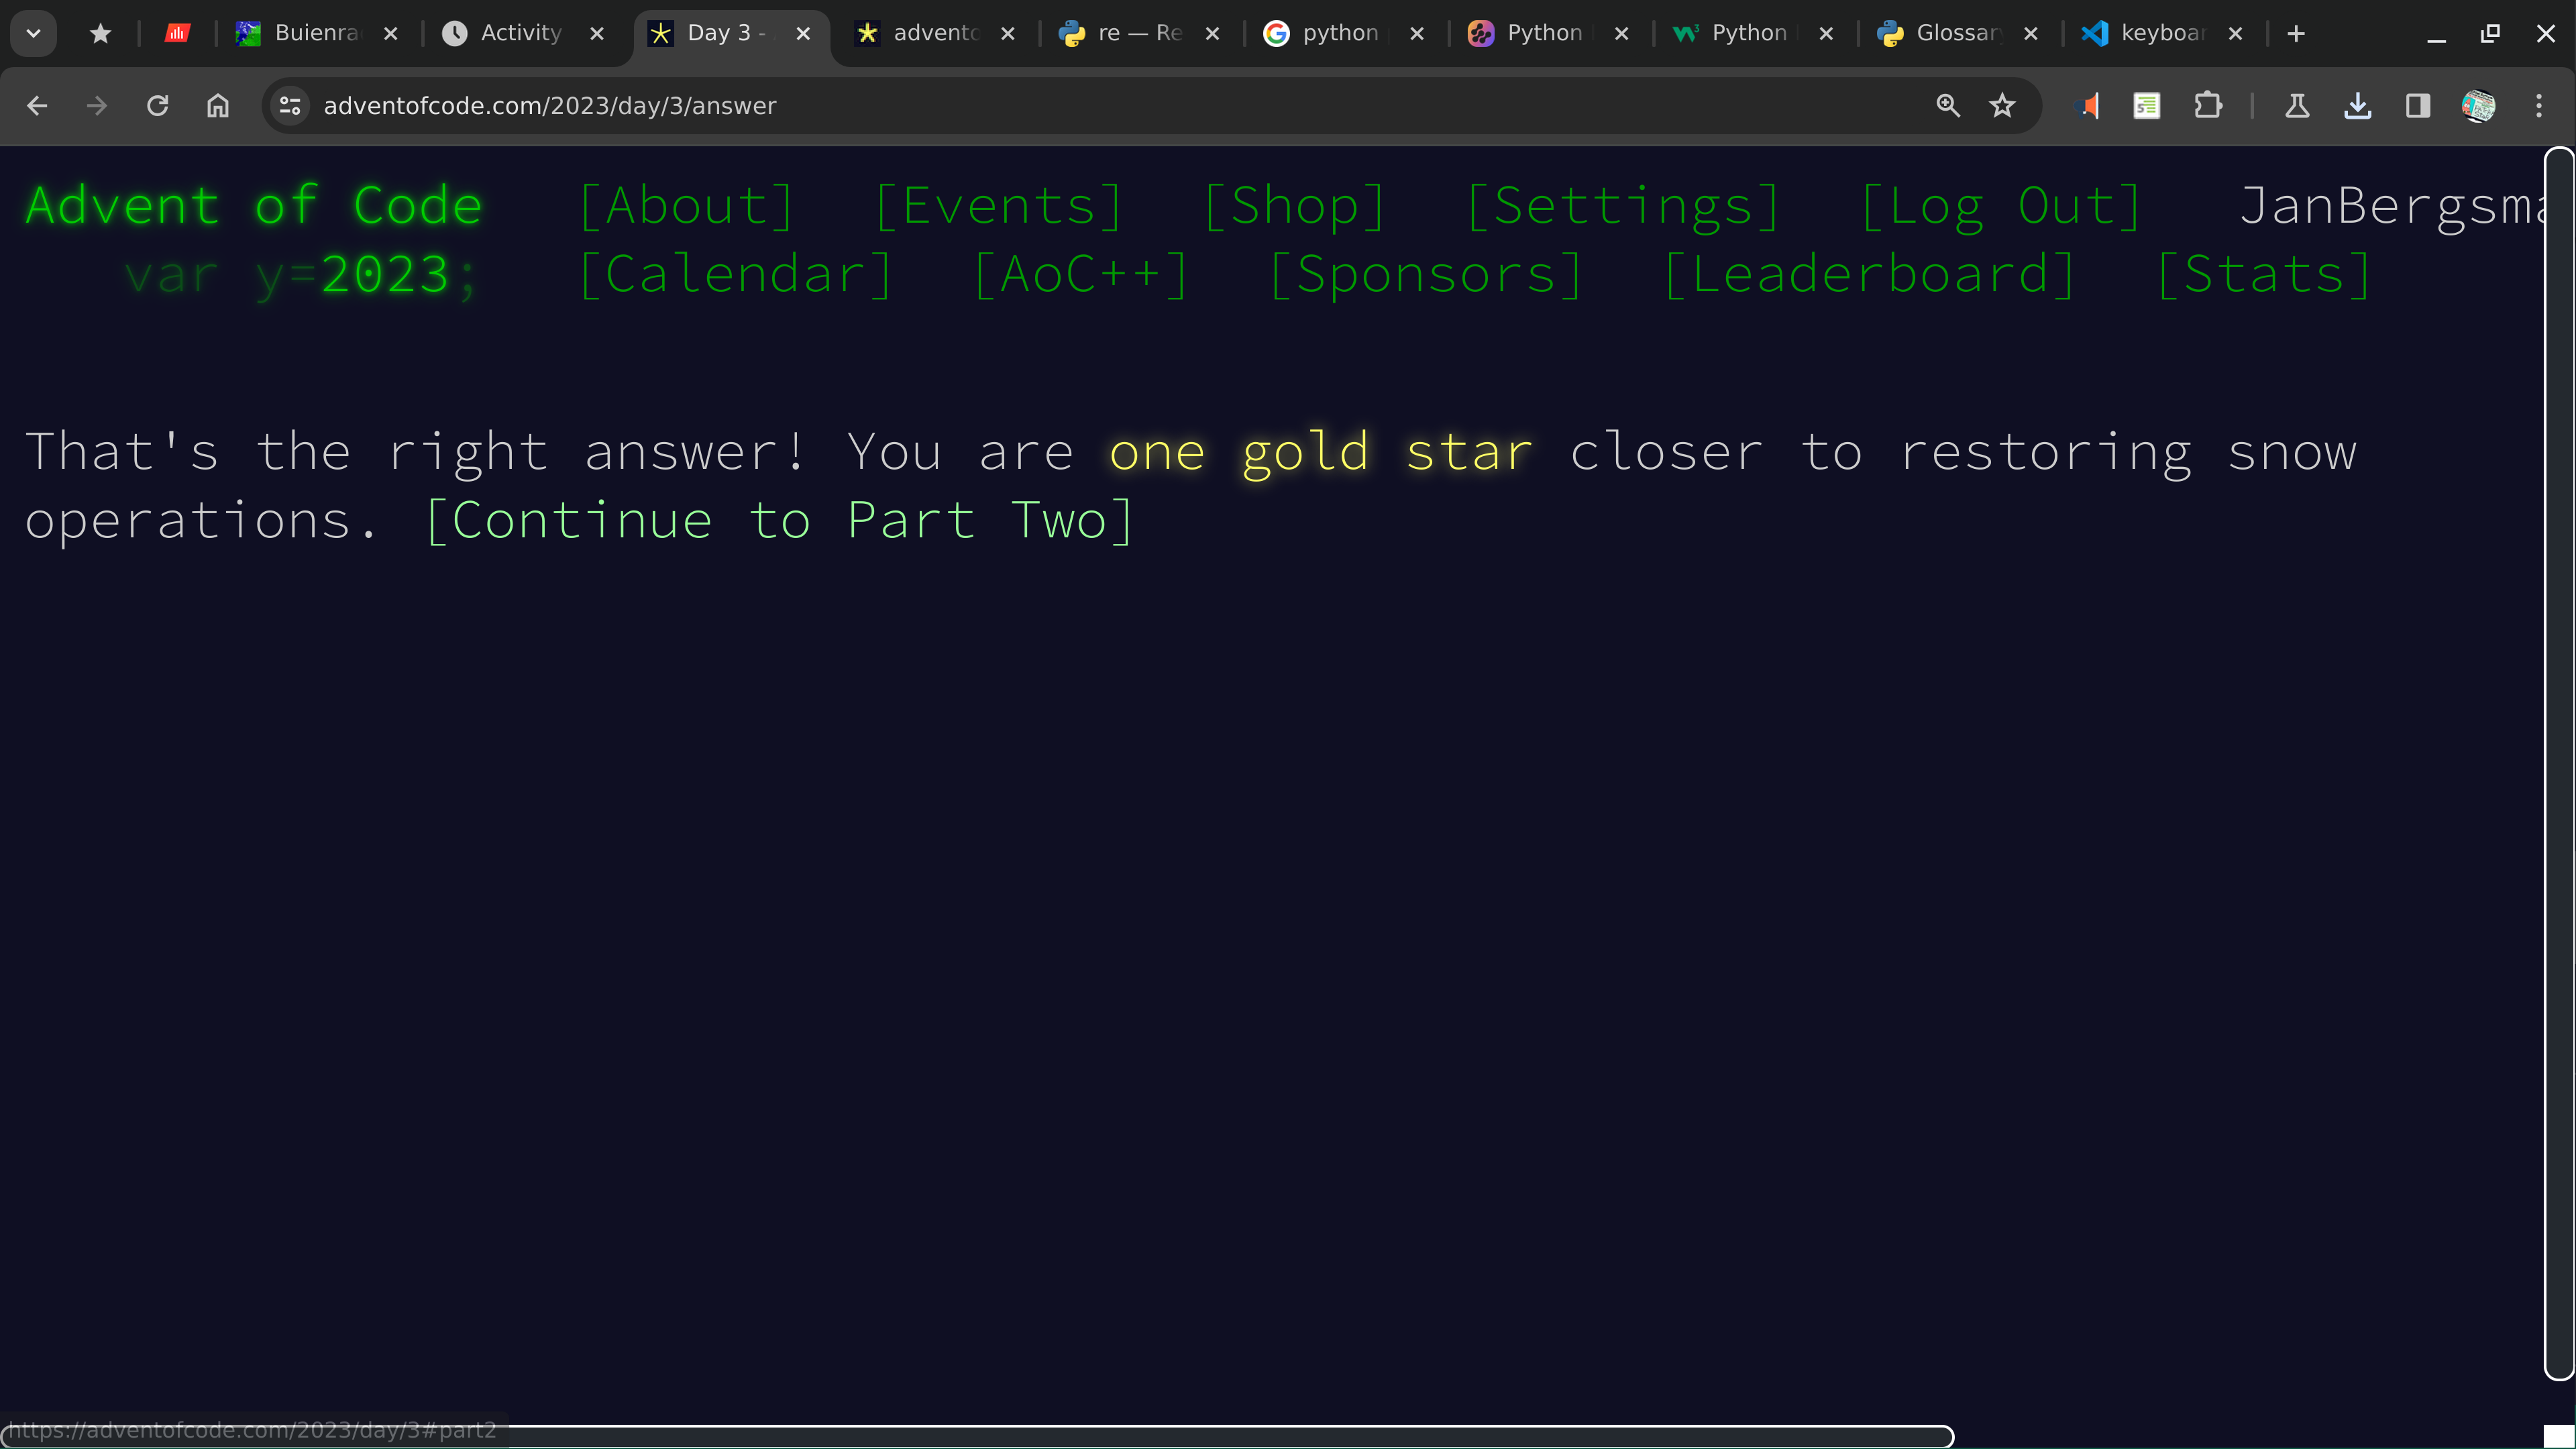
